In [1]:
using Distributed
addprocs(4)


4-element Vector{Int64}:
 2
 3
 4
 5

In [85]:
@everywhere include("./SSH_T_parm.jl")
@everywhere include("./transport.jl")

In [3]:
using DataFrames
using CSV
using Plots

In [104]:
K_SIZE = 1000
kk = get_kk(K_SIZE)
dk2 = (2pi)/(K_SIZE)
η = 0.02
st = 5.0
ed = 7.0
Win0 = collect(st:0.1:ed)
#μ, t1, t2, J, m, eta, T, hx, Δz, K_SIZE, W_MAX, W_in, W_SIZE, α, β, γ
#μ, t1, t2, J, m, eta, T, hx, dz, K_size, Wmax, Win, Wsize, abc,
arg = ["0.0", "1.0", "-0.1", "3.0", "0.2", "0.02", "0.005", "1000", "5.0", "0.5", "5000", "1", "1", "1"]

14-element Vector{String}:
 "0.0"
 "1.0"
 "-0.1"
 "3.0"
 "0.2"
 "0.02"
 "0.005"
 "1000"
 "5.0"
 "0.5"
 "5000"
 "1"
 "1"
 "1"

In [140]:
@everywhere include("./SSH_T_parm.jl")
@everywhere include("./transport.jl")

In [149]:
#Green_W = zeros(Float64,length(Win0), 12)
arg = ["0.0", "1.0", "-0.1", "3.0", "0.2", "0.02", "0.05", "1000", "5.0", "0.5", "5000", "1", "1", "1"]
Velocity_W = zeros(Float64,length(Win0), 12)
Length_W = zeros(Float64,length(Win0), 12)

for j in 1:size(Win0)[1]
    #μ, t1, t2, J, m, eta, T, hx, dz, K_size, Wmax, Win, Wsize, abc, 
    p = Parm(set_parm_Wdep(arg, Win0[j])...)

    #kk = get_kk(p.K_SIZE)
    
    
    if j == 1
        println("Parm(t, tl, ar, ad, mu, eta, T, hx, dz, K_size, Wmax, Win, Wsize, abc)")
        println(p)
    end
    #=
    Green_W[j,:] = @distributed (+) for i in 1:size(kk)[1]
        Hamk = Hamiltonian(HandV_fd(kk[i],p)...)
        HV_BI!(Hamk)
        dk2*Green_PV_BI(p, Hamk)
    end
    =#

    Velocity_W[j,:] = @distributed (+) for i in 1:size(kk)[1]
        Hamk = Hamiltonian(HandV_fd(kk[i],p)...)
        HV_BI!(Hamk)
        dk2*Velocity_PV_BI(p, Hamk)
    end

    Length_W[j,:] = @distributed (+) for i in 1:size(kk)[1]
        Hamk = Hamiltonian(HandV_fd(kk[i],p)...)
        HV_BI!(Hamk)
        dk2*Length_PV_BI(p, Hamk)
    end

    #print("#")
    #if(j%10==0)
    #    print("||")
    #end
end

Parm(t, tl, ar, ad, mu, eta, T, hx, dz, K_size, Wmax, Win, Wsize, abc)
Parm(0.0, 1.0, -0.1, 0.7853981633974483, 3.0, 0.2, 0.02, 0.05, 1000, 5.0, 5.0, 5000, [1, 1, 1], 2)


In [150]:

#arg0 = ["0.0", "1.0", "-0.1", "3.0", "0.2", "0.02", "0.005", "1000", "5.0", "0.5", "5000", "1", "1", "1"]
Green_W = zeros(Float64,length(Win0), 12)
for j in 1:size(Win0)[1]
    #μ, t1, t2, J, m, eta, T, hx, dz, K_size, Wmax, Win, Wsize, abc, 
    p = Parm(set_parm_Wdep(arg, Win0[j])...)

    #kk = get_kk(p.K_SIZE)
    
    
    if j == 1
        println("Parm(t, tl, ar, ad, mu, eta, T, hx, dz, K_size, Wmax, Win, Wsize, abc)")
        println(p)
    end

    Green_W[j,:] = @distributed (+) for i in 1:size(kk)[1]
        Hamk = Hamiltonian(HandV_fd(kk[i],p)...)
        HV_BI!(Hamk)
        dk2*Green_PV_BI(p, Hamk)
    end
end

Parm(t, tl, ar, ad, mu, eta, T, hx, dz, K_size, Wmax, Win, Wsize, abc)
Parm(0.0, 1.0, -0.1, 0.7853981633974483, 3.0, 0.2, 0.02, 0.05, 1000, 5.0, 5.0, 5000, [1, 1, 1], 2)


In [21]:
Plots.scalefontsizes(1.4)

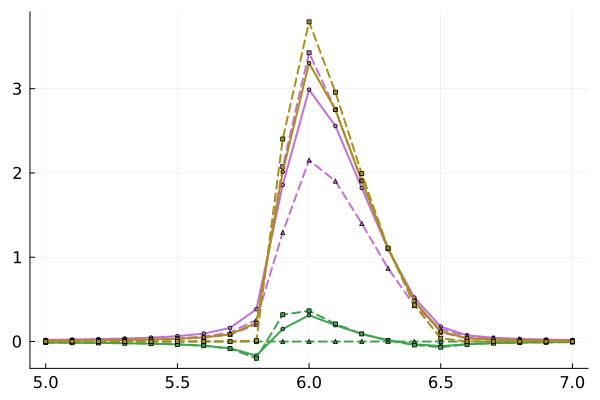

In [151]:
#p1 = plot(Win0, Green_W[:,1], label="Dr", xlabel="Ω",ylabel="σ",title="Ω-dependence", width=2.0, marker=:circle, markersize = 2.0, color=1)
#p1 = plot!(Win0, Velocity_W[:,1], label="V_Dr", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=1, legend=nothing)
#p1 = plot!(Win0, Length_W[:,1], label="L_Dr", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=1, legend=nothing)

#p1 = plot!(Win0, Green_W[:,3], label="BCD", width=2.0, marker=:circle, markersize = 2.0, color=2)
#p1 = plot!(Win0, Velocity_W[:,3], label="BCD_Dr", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=2, legend=nothing)
#p1 = plot!(Win0, Length_W[:,3], label="BCD_Dr", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=2, legend=nothing)

p1 = plot(Win0, Green_W[:,5]+Green_W[:,9], label="Shift", width=2.0, marker=:circle, markersize = 2.0, color=3)
p1 = plot!(Win0, Velocity_W[:,5]+Velocity_W[:,9], label="Shift_Dr", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=3, legend=nothing)
p1 = plot!(Win0, Length_W[:,5]+Length_W[:,9], label="Shift_Dr", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=3, legend=nothing)

p1 = plot!(Win0, Green_W[:,7], label="Inj", width=2.0, marker=:circle, markersize = 2.0, color=4)
p1 = plot!(Win0, Velocity_W[:,7], label="Inj_Dr", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=4, legend=nothing)
p1 = plot!(Win0, Length_W[:,7]/2, label="Inj_Dr", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=4, legend=nothing)

p1 = plot!(Win0, Green_W[:,11], label="tot", width=2.0, marker=:circle, markersize = 2.0, color=5)
p1 = plot!(Win0, Velocity_W[:,11], label="tot_V", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=5, legend=nothing)
#p1 = plot!(Win0, Length_W[:,11], label="tot_L", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=5, legend=nothing)
#savefig(p1,"./PV_Linear_Wdep_η$(η).png")

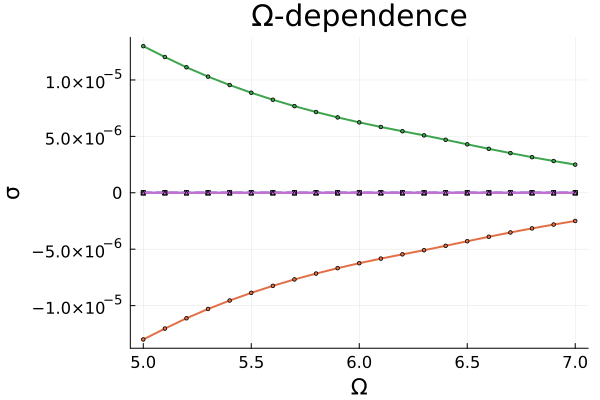

In [148]:
p2 = plot(Win0, Green_W[:,2], label="Dr", xlabel="Ω",ylabel="σ",title="Ω-dependence", width=2.0, marker=:circle, markersize = 2.0, color=1)
p2 = plot!(Win0, Velocity_W[:,2], label="V_Dr", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=1, legend=nothing)
#p2 = plot!(Win0, Length_W[:,2], label="L_Dr", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=1, legend=nothing)

p2 = plot!(Win0, Green_W[:,4], label="BCD", width=2.0, marker=:circle, markersize = 2.0, color=2)
#p2 = plot!(Win0, Velocity_W[:,4], label="BCD_Dr", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=2, legend=nothing)
#p2 = plot!(Win0, Length_W[:,4], label="BCD_Dr", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=2, legend=nothing)

p2 = plot!(Win0, Green_W[:,6]+Green_W[:,10], label="Shift", width=2.0, marker=:circle, markersize = 2.0, color=3)
#p2 = plot!(Win0, Velocity_W[:,6]+Velocity_W[:,10], label="Shift_Dr", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=3, legend=nothing)
#p2 = plot!(Win0, Length_W[:,6]+Length_W[:,10], label="Shift_Dr", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=3, legend=nothing)

p2 = plot!(Win0, Green_W[:,8], label="Inj", width=2.0, marker=:circle, markersize = 2.0, color=4)
p2 = plot!(Win0, Velocity_W[:,8], label="Inj_Dr", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=4, legend=nothing)
p2 = plot!(Win0, Length_W[:,8], label="Inj_Dr", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=4, legend=nothing)

p2 = plot!(Win0, Green_W[:,12], label="Tot", width=2.0, marker=:circle, markersize = 2.0, color=4)
p2 = plot!(Win0, Velocity_W[:,12], label="Inj_Dr", style=:dash, width=2.0, marker=:square, markersize = 2.0, color=4, legend=nothing)
p2 = plot!(Win0, Length_W[:,12], label="Inj_Dr", style=:dash, width=2.0, marker=:utriangle, markersize = 2.0, color=4, legend=nothing)
    #savefig(p2,"./PV_CP_Wdep_η$(η).png")